# Subgraph Isomorphism: Real world applications

First let's define the Subgraph Isomorphism problem: 
### TODO  ADD 

Many real-world structures can be represented using graphs. Some of them are involved in problems that can be solved using sub-graph isomorphism algorithms. In this notebook we will study two real-world applications: 
- Pattern Recognition in images 
- Proteins classification 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## Using Graphs to represent images

Let's use subgraph isomorphism to find our phone in our messy desk. First, this is an image of our desk:

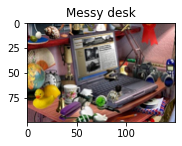

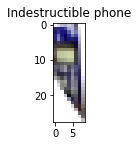

In [2]:
plt.subplot(221)
m = plt.imread('nocopy_150x100.png')
plt.imshow(m)
plt.title("Messy desk")
plt.show()

plt.subplot(222)
c = plt.imread('phone_color.png')
plt.imshow(c)
plt.title("Indestructible phone")
plt.show()

Image Source: https://pixabay.com/illustrations/computer-room-desk-toys-game-play-627220/

To simplify this problem, let's convert these images into grayscale. After this, the images will be a 2d array where each position represents a pixel. 
Also, let's define 0 (black pixel) as a null pixel. So we will have to delete all null pixels from our desk image. This will let us delete the background in the phone image.  

### TODO: how to hide some code?

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
#Preprocessing: Delete black pixels 
I = rgb2gray(plt.imread('nocopy_150x100.png'))
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        if I[i][j] == 0:
            I[i][j] = 0.0001
plt.imsave('nocopy_150x100_p.png', I)

These will be the final images:

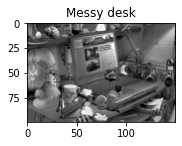

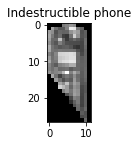

In [5]:
plt.subplot(221)

I = rgb2gray(plt.imread('nocopy_150x100_p.png')) #Desk
plt.imshow(I, cmap="gray")
plt.title("Messy desk")
plt.show()

plt.subplot(222)

I2 = rgb2gray(plt.imread('phone.png')) #Object to find
plt.imshow(I2, cmap="gray")
plt.title("Indestructible phone")
plt.show()

Now we can represent these images as graphs.

For this, we can use *grid_2d_graph(n, m)*. This function creates a $nxm$ grid where each coordinate is a node and each node is connected to its four nearest neighbors. 

For the phone graph, we will delete all the nodes corresponding to null pixels.


In [6]:
desk_graph = nx.grid_2d_graph(I.shape[0], I.shape[1])
phone_graph = nx.grid_2d_graph(I2.shape[0], I2.shape[1])

#assing pixel values as node attributes in desk 
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        desk_graph.nodes[(i, j)]["weight"] = I[i][j] 

#assing pixel values as node attributes in phone and delete useless nodes    
for i in range(0, I2.shape[0]):
    for j in range(0, I2.shape[1]):
        if I2[i][j] != 0:
            phone_graph.nodes[(i, j)]["weight"] = I[i][j]
        else:
            phone_graph.remove_node((i,j))

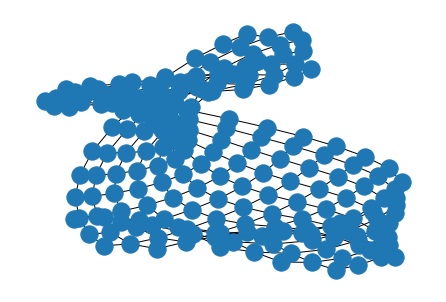

In [31]:
nx.draw_spring(phone_graph) 
#TODO maybe color the nodes using the weight attribute

Finally, let's see if we can match our phone graph to the desk graph.

In [30]:
import networkx.algorithms.isomorphism as iso

em = iso.numerical_edge_match("weight", 10^-10)
g = iso.GraphMatcher(desk_graph, phone_graph, node_match=em)
g.subgraph_is_isomorphic()

True

Also, we can check that the desk and phone graphs are not isomorphic. 

In [9]:
nx.is_isomorphic(desk_graph, phone_graph, edge_match=em)

False

### References 
- 

## Proteins Secondary structure

Proteins are large biomolecules and macromolecules that comprise one or more long chains of amino acid residues. Proteins are key in many biological processes within organisms. 

Proteins differ from one another primarily in their sequence of amino acids, which is dictated by the nucleotide sequence of their genes, and which usually results in protein folding into a specific 3D structure that determines its activity.

Biochemists often refer to four distinct aspects of a protein's structure, We will be interested in the secondary structure.  

**Secondary Structure** : regularly repeating local structures stabilized by hydrogen bonds. The most common examples are the α-helix, β-sheet, and turns. Because secondary structures are local, many regions of different secondary structures can be present in the same protein molecule.

TODO: ADD IMAGE

Many graph representations can be built from the Secondary Structure. Each representation capture different information about the protein. For example, 
- α-helix and β-sheet as nodes and energy interaction as edge weights 

- Cα atom of an amino acid residue is considered a node and an edge are drawn if the Cα distance between a pair of residues is within a threshold distance. It is one of the simplest and most widely analyzed protein contact networks that captures very well the 3D topology of protein structure.


We will work on $C_\alpha$ networks. TODO: EXPLAIND MORE

Let's see graphs of proteing with PDB codes 1CRN and 1FN3. 
**TODO: add where these proteins are from**

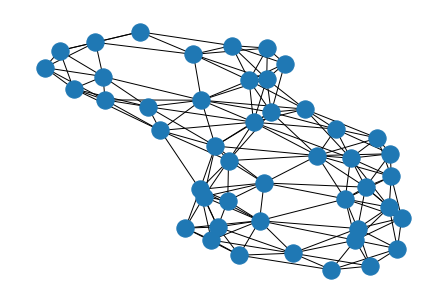

In [32]:
CRN = nx.read_edgelist("1CRN_edgelist.txt", nodetype=str, data=(("weight", float),))
nx.draw_spring(CRN)

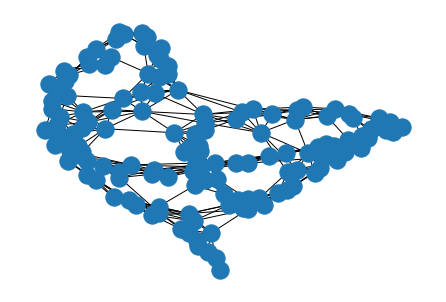

In [25]:
FN = nx.read_edgelist("1FN3_edgelist.txt", nodetype=str, data=(("weight", float),))
nx.draw_spring(FN)

We can identify graphlets that are present in these graphs and use that to classify proteins. These graphlets can be randomly generated given a certain number of nodes using Erdos-graphs generators. Even more, we can extract some subgraphs from the proteins and test if they are present in other proteins. 
This can have many applications as building tree-classification models.

In [ ]:
# TODO. Add some example of generating a graphlet and try to find it into the proteins

### References 
- https://en.wikipedia.org/wiki/Protein
- https://en.wikipedia.org/wiki/Protein_secondary_structure
- https://www.rcsb.org/docs/general-help/organization-of-3d-structures-in-the-protein-data-bank